In [1]:
import pickle
import math
import numpy as np

import matplotlib
font = {'size':16}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.facecolor'] = 'white'
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib as mpl

In [2]:
class Data_Scenario3():
    def __init__(self, p=0.9, τ=30, max_t=1000):
        self.p = [[p, 1-p], [1-p, p]]
        self.τ = τ
        self.max_t = max_t

    def get_samples(self, t):
        # y0 = np.random.choice([0, 1])
        y0 = 1
        y_seq = [y0]
        # for _ in range(self.max_t-1):
        for _ in range(t + 10 - 1):
            y_seq.append(np.random.choice([0, 1], p=self.p[y_seq[-1]]))
        # y_train, y_test = y_seq[:t], y_seq[t:]
        return y_seq
        return y_train, y_test

In [3]:
def MC(T=20,theta=0.1,reps = 50):
    Y_reps = np.zeros((reps,T))
    for rep in range(reps):
        Y = [1]
        y_0 =  np.random.choice([0,1], size=9,p = [theta,1-theta])
        # y_0 = 0
        Y.extend(y_0)
        for t in range(10,T):
            if Y[t-1] == 0:
                y_t = np.random.choice([0,1], size=1,p = [theta,1-theta])[0]
            elif Y[t-1] == 1:
                y_t = np.random.choice([0,1], size=1,p = [1-theta,theta])[0]
            Y.append(y_t)
        Y_reps[rep,:] = Y
    return Y_reps

In [4]:
def MC_sub(T=20,T_end = 40,theta_0=0.5,theta_1=0.5,reps = 50):
    Y_reps = np.zeros((reps,T_end))
    for rep in range(reps):
        Y = np.ndarray.tolist(np.random.binomial(1, 0.5, size=(1 , T)))[0]
        theta_0t = theta_0
        theta_1t = theta_1
        for t in range(T,T_end):
            if Y[t-1] == 0:
                y_t = np.random.choice([0,1], size=1,p = [theta_0t,1-theta_0t])[0]
            elif Y[t-1] == 1:
                y_t = np.random.choice([0,1], size=1,p = [1-theta_1t,theta_1t])[0]
            Y.append(y_t)
            theta_0t = 1-np.sum(Y)/len(Y)
            theta_1t = np.sum(Y)/len(Y)
        Y_reps[rep,:] = Y
    return Y_reps[:,T:]

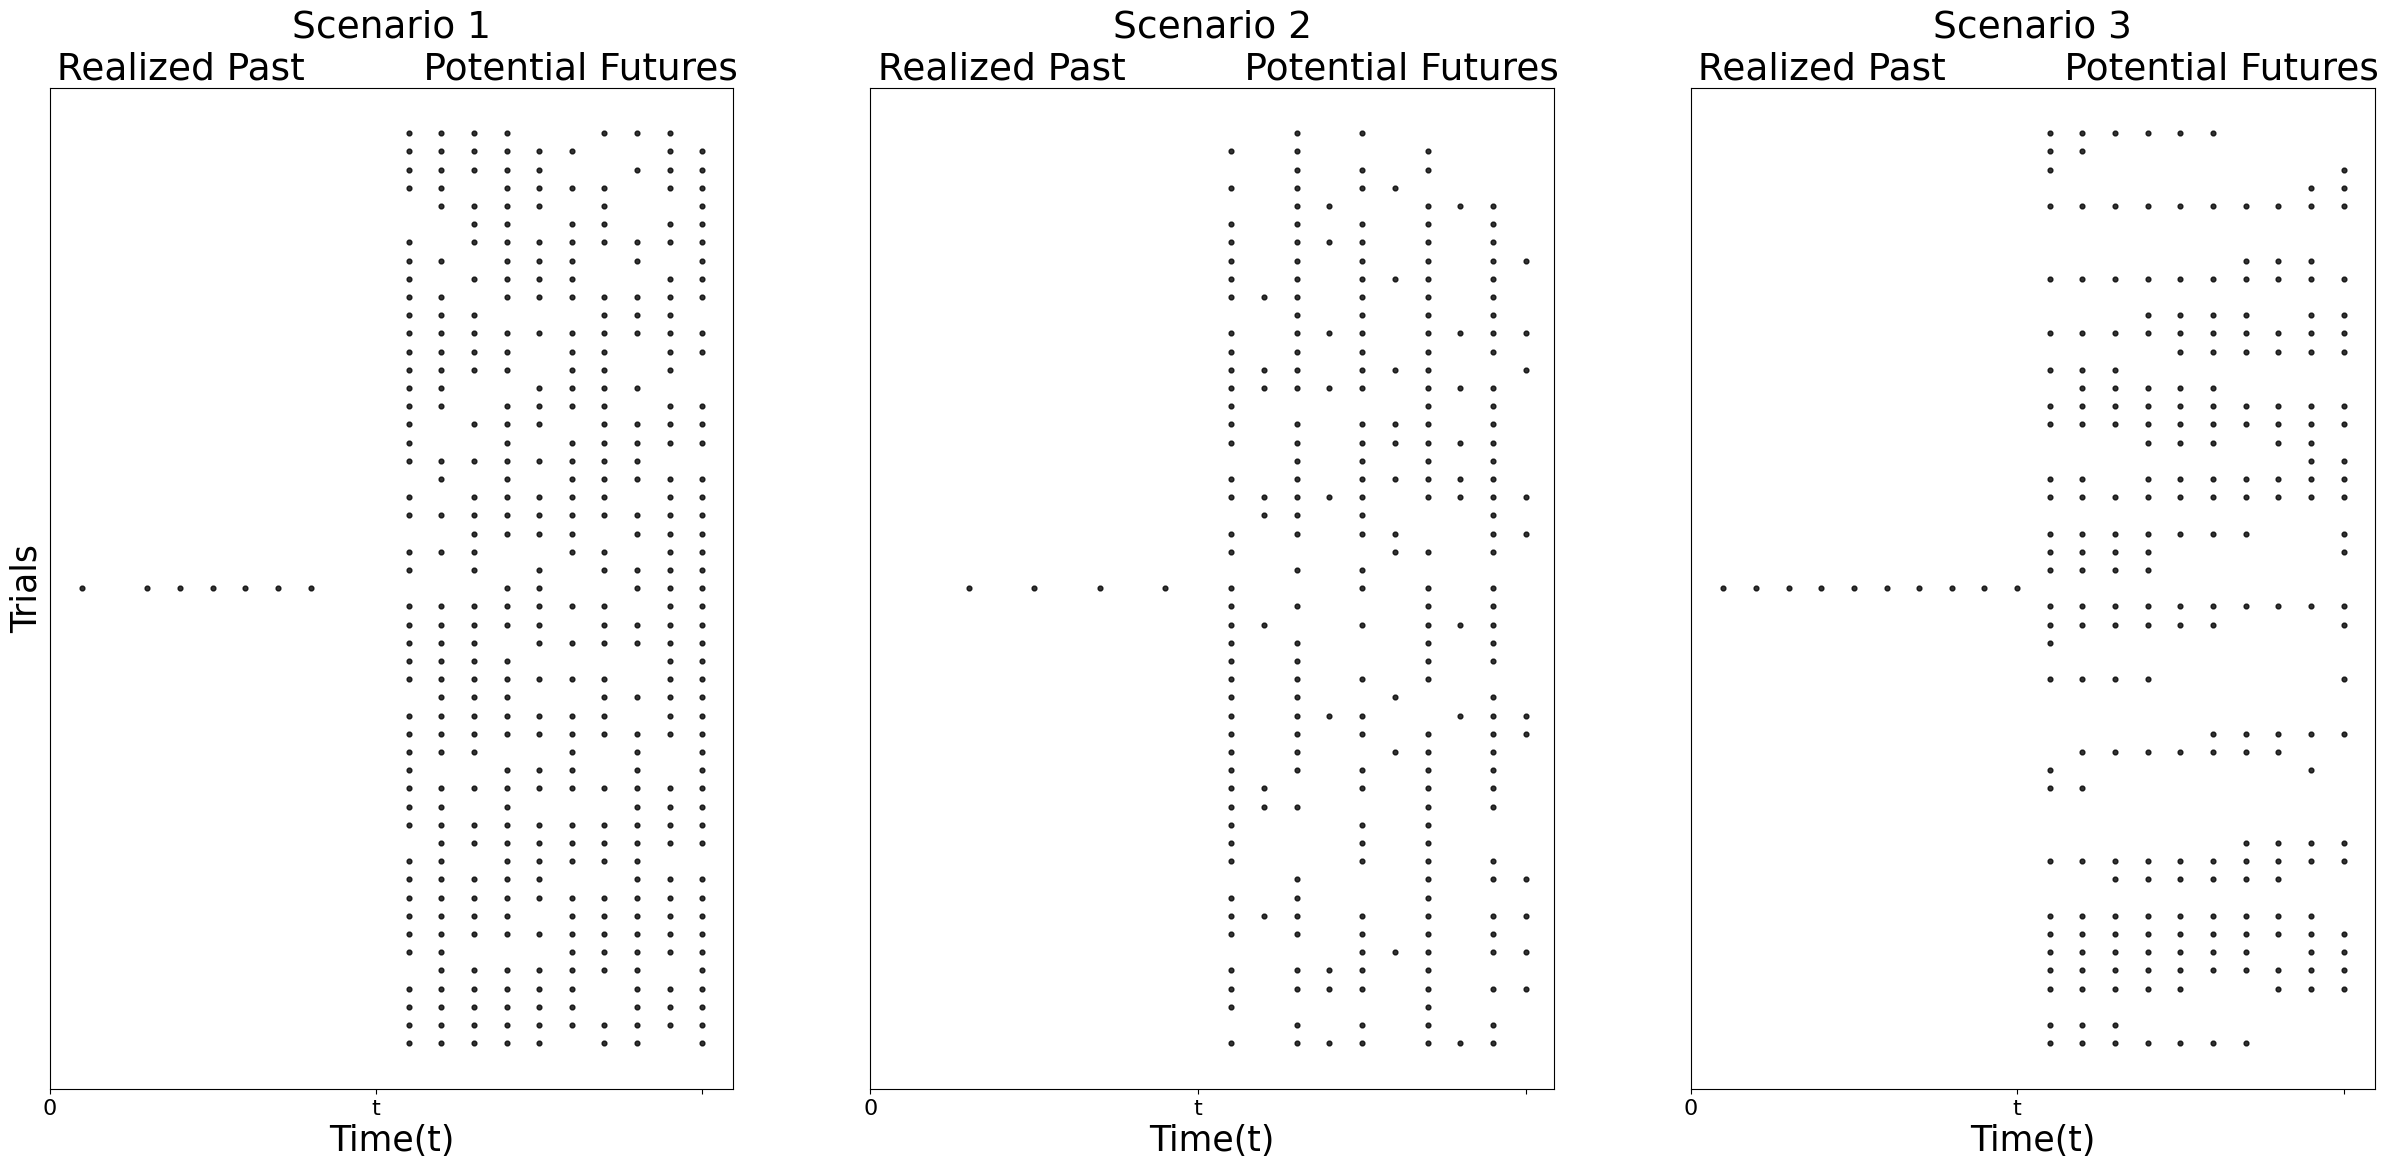

In [6]:
fig, ax = plt.subplots(1, 3 ,figsize=(30,13))
fontsize = 15
p = 0.8
q = 0.2
T = 20
T_initial = 10
T_end = 20
reps_1 = 51

reps_2 = 100
initial_show = int(reps_1/2)
## Senario 1
outcomes = np.random.binomial(1, p, size=(reps_1 , T_end))
outcomes[:initial_show,:T_initial] = np.zeros((initial_show,T_initial))
outcomes[initial_show+1:,:T_initial] = np.zeros((reps_1-1-initial_show,T_initial))
t_list = np.arange(1, T+1, 1)
outcomes = outcomes.astype(float)
# print(outcomes[:,:T_initial].shape)
outcomes[outcomes==0] = np.nan
for rep in range(reps_1):
    y = (outcomes[rep,:]+rep) * outcomes[rep,:]
    # print(y)
    if rep != initial_show:
        y[:T_initial] = np.nan
    ax[0].scatter(t_list,y, c = 'black',alpha = 0.8,s = 12)
ax[0].set_title('Scenario 1\n Realized Past          Potential Futures',fontsize = fontsize+12)



### Senario 2
pattern = np.array([True, False]*T_end)[:T_end]

# sample a bunch of sequences from the process
p_pattern = np.zeros(T_end)
p_pattern[pattern] = p
p_pattern[~pattern] = q
outcomes = np.random.binomial(1, p_pattern, size=(reps_1, T_end))
outcomes[:initial_show,:T_initial] = np.zeros((initial_show,T_initial))
outcomes[initial_show+1:,:T_initial] = np.zeros((reps_1-1-initial_show,T_initial))
# outcomes = np.random.binomial(1, p, size=(reps_2 , T_end))
outcomes = outcomes.astype(float)
outcomes[outcomes==0] = np.nan
# print(outcomes)
t_list = np.arange(1, T+1, 1)
for rep in range(reps_1):
    y = (outcomes[rep,:]+rep) * outcomes[rep,:]
    # print(y)
    if rep != initial_show:
        y[:T_initial] = np.nan
    ax[1].scatter(t_list,y, c = 'black',alpha = 0.8,s = 12)
ax[1].set_title('Scenario 2\n Realized Past          Potential Futures',fontsize = fontsize+12)

### Senario 3
t_list = np.arange(1, T+1, 1)
outcomes = np.zeros((reps_1,T))
for i in range(reps_1):
    outcomes_i = Data_Scenario3().get_samples(t = 10)
    outcomes[i,:] = outcomes_i
outcomes[:initial_show,:T_initial] = np.zeros((initial_show,T_initial))
outcomes[initial_show+1:,:T_initial] = np.zeros((reps_1-1-initial_show,T_initial))
outcomes = outcomes.astype(float)
outcomes[outcomes==0] = np.nan
for rep in range(reps_1):
    y = (outcomes[rep,:]+rep) * outcomes[rep,:]
    # print(y)
    if rep != initial_show:
        y[:T_initial] = np.nan
    ax[2].scatter(t_list,y, c = 'black',alpha = 0.8,s = 12)
ax[2].set_title('Scenario 3\n Realized Past          Potential Futures',fontsize = fontsize+12)


for i in range(3):
    ax[i].set_yticks([])
    ax[i].set_xticks([0,10,20],[0,'t',''])
    ax[i].set_xlabel('Time(t)',fontsize = fontsize+10)
    if i ==0:
        ax[i].set_ylabel('Trials',fontsize = fontsize+10)
    else:
        ax[i].set_ylabel('')
# plt.suptitle('Rastergram of Four Scenarios',fontsize = fontsize+10)
plt.savefig("rastergram.pdf", format="pdf", bbox_inches="tight") 